In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [10]:
cols=['bike_count','hour','temp','humidity','wind','visibility','dew_point_temp','radiation','rain','snow','functional']

In [22]:
df=pd.read_csv('SeoulBikeData.csv')

In [23]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [24]:
df=df.drop(['Date','Holiday','Seasons'],axis=1)

In [25]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [26]:
df.columns=cols

In [27]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_point_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [28]:
df['functional']=(df['functional']=='Yes').astype(int)

In [29]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_point_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [30]:
df=df[df['hour']==12]

In [31]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_point_temp,radiation,rain,snow,functional
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [32]:
df=df.drop(['hour'],axis=1)

In [33]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_point_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


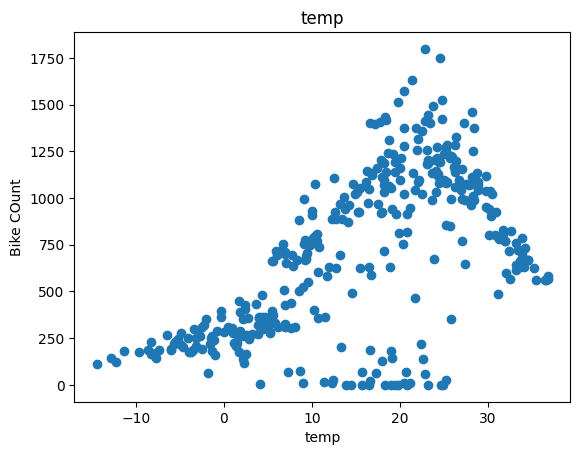

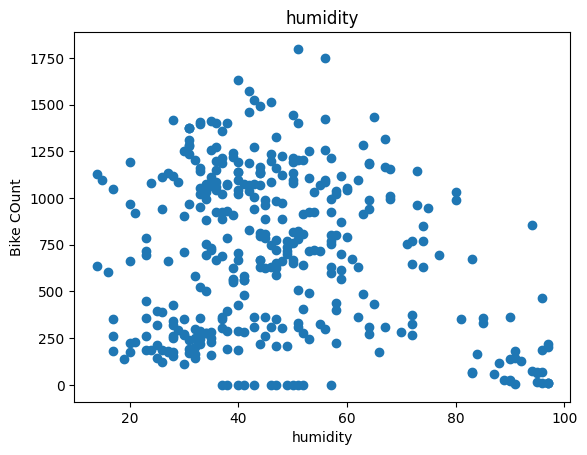

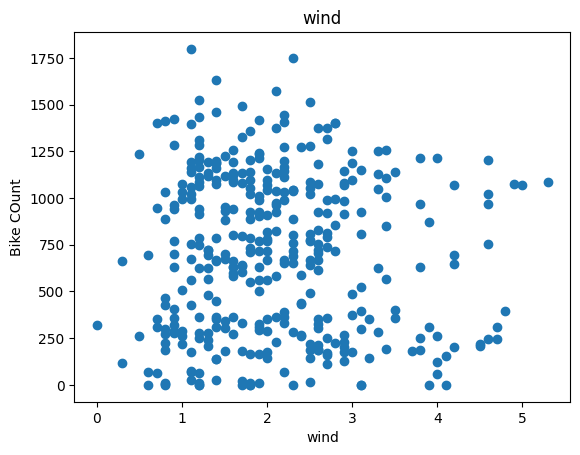

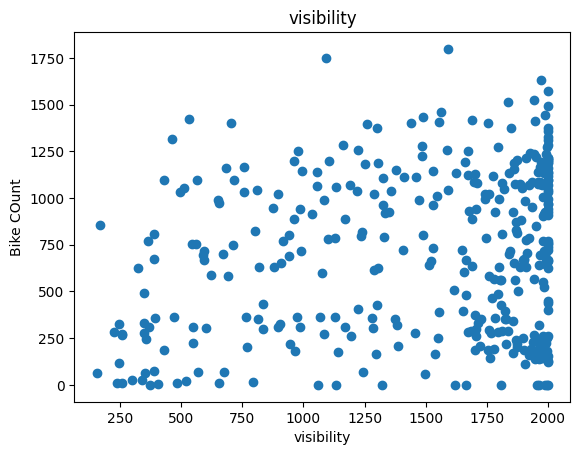

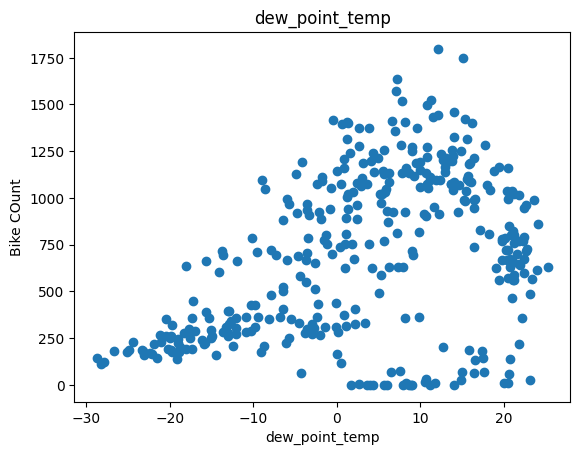

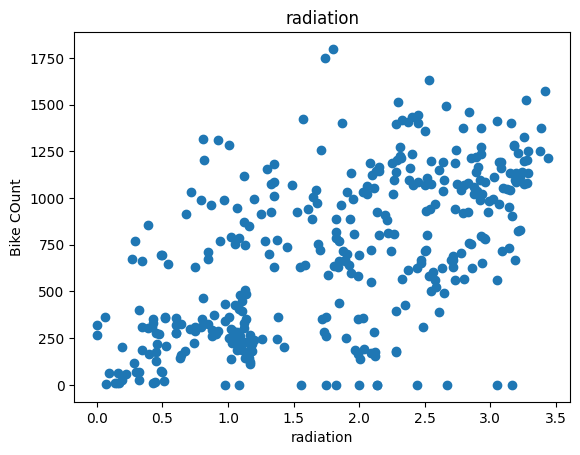

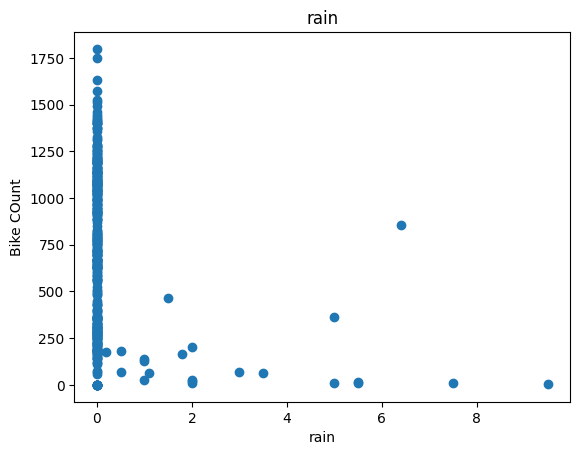

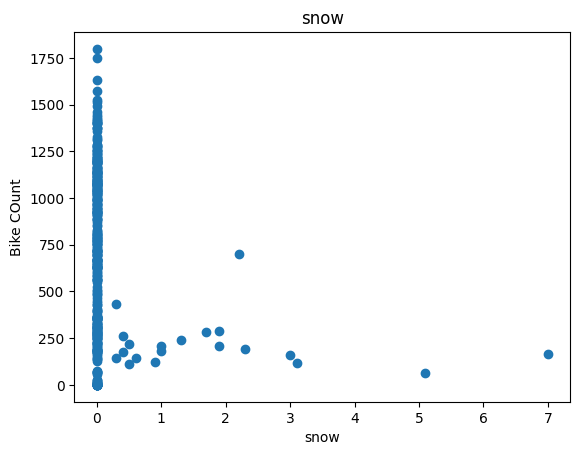

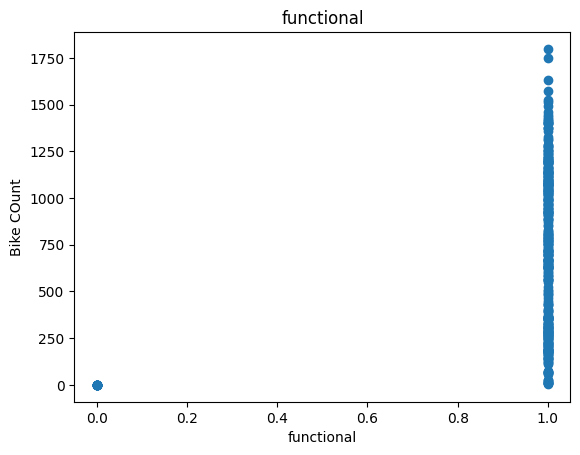

In [34]:
for label in df.columns[1:]:
  plt.scatter(df[label],df['bike_count'])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Bike COunt')
  plt.show()

In [35]:
df=df.drop(['wind','visibility','functional'],axis=1)

In [36]:
df.head()

,bike_count,temp,humidity,dew_point_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


## Split

In [80]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [48]:
def get_xy(dataframe,y_label,x_labels=None):
  dataframe=copy.deepcopy(dataframe)
  if x_labels is None:
    x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else :
    if len(x_labels)==1:
      x=dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x=dataframe[x_labels].values
  y=dataframe[y_label].values.reshape(-1,1)
  data=np.hstack((x,y))
  return data,x,y

In [40]:
_, x_train_temp, y_train_temp=get_xy(train,'bike_count',x_labels=['temp'])
_, x_val_temp, y_val_temp=get_xy(val,'bike_count',x_labels=['temp'])
_, x_test_temp, y_test_temp=get_xy(test,'bike_count',x_labels=['temp'])

In [41]:
temp_reg=LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [42]:
print(temp_reg.coef_,temp_reg.intercept_)

[[21.84694972]] [366.39694438]


In [43]:
temp_reg.score(x_test_temp,y_test_temp)


0.31163192176635723

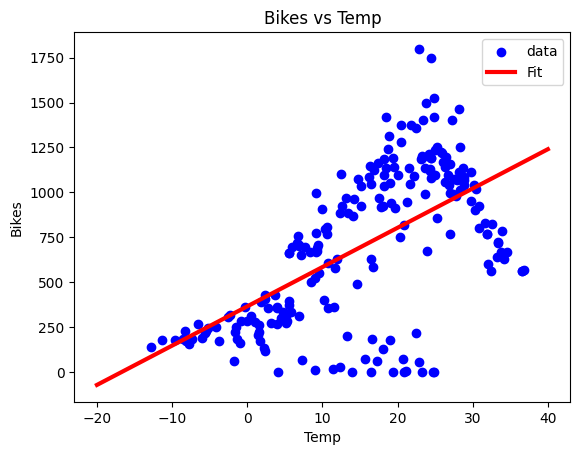

In [45]:
plt.scatter(x_train_temp,y_train_temp,label='data',color='blue')
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.xlabel('Temp')
plt.ylabel('Bikes')
plt.show()

In [46]:
#   Multiple Linear Reg

In [47]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_point_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [81]:
_, x_train, y_train =get_xy(train,'bike_count',x_labels=df.columns[1:])
_, x_val , y_val =get_xy(val,'bike_count',x_labels=df.columns[1:])
_, x_test, y_test =get_xy(test,'bike_count',x_labels=df.columns[1:])

In [58]:
temp_reg=LinearRegression()
temp_reg.fit(x_train,y_train)

LinearRegression()

In [59]:
print(temp_reg.coef_,temp_reg.intercept_)

[[ -4.82546928  -9.69585935  24.53502035 113.65079994 -25.16889034
   -9.93182944]] [954.61388251]


In [60]:
temp_reg.score(x_test,y_test)

0.4515199688066326

# Regression With Neural NEtwork

In [62]:
temp_norm=tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_norm.adapt(x_train_temp.reshape(-1))

In [63]:
temp_nn_model=tf.keras.Sequential([
    temp_norm,
    tf.keras.layers.Dense(units=1)
])

In [64]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss=tf.keras.losses.MeanSquaredError())

In [66]:
history=temp_nn_model.fit(
    x_train_temp.reshape(-1),y_train_temp,
    verbose=0,
    validation_data=(x_val_temp,y_val_temp),
    epochs=1000
)

In [67]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSError')
  plt.legend()
  plt.grid(True)
  plt.show()

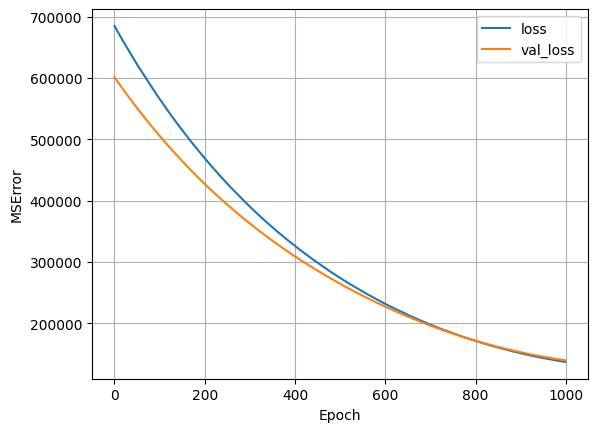

In [68]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


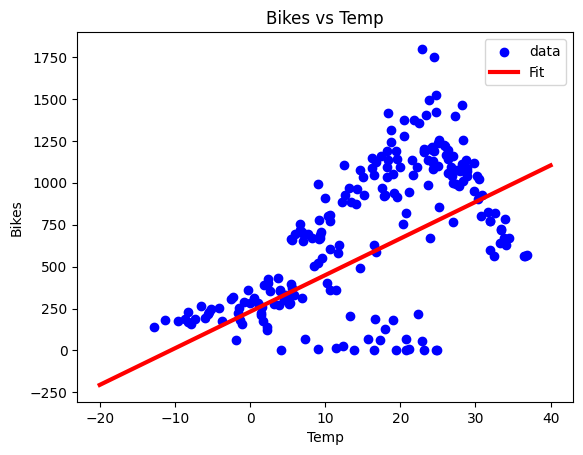

In [70]:
plt.scatter(x_train_temp,y_train_temp,label='data',color='blue')
x=tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.xlabel('Temp')
plt.ylabel('Bikes')
plt.show()

Neural Network

In [71]:
nn_model=tf.keras.Sequential([
    temp_norm,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.MeanSquaredError())

In [72]:
history_nn=nn_model.fit(
    x_train_temp,y_train_temp,
    verbose=0,
    validation_data=(x_val_temp,y_val_temp),
    epochs=100
)

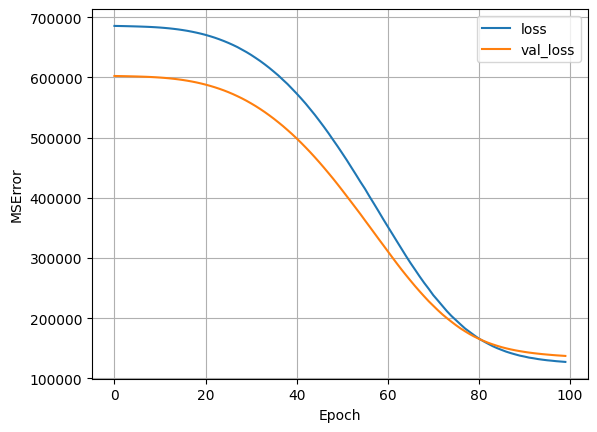

In [73]:
plot_loss(history_nn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


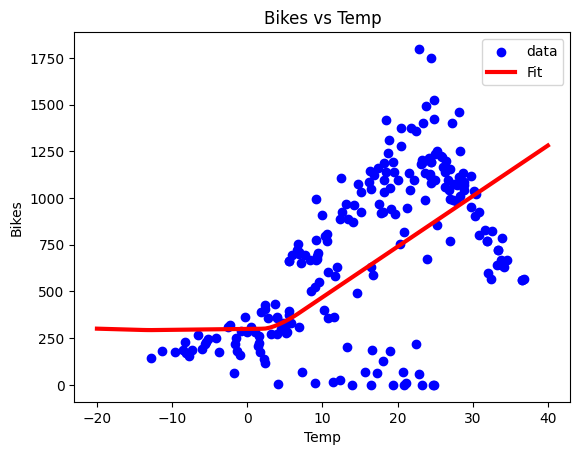

In [74]:
plt.scatter(x_train_temp,y_train_temp,label='data',color='blue')
x=tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth=3)
plt.legend()
plt.title('Bikes vs Temp')
plt.xlabel('Temp')
plt.ylabel('Bikes')
plt.show()

Multiple

In [85]:
all_norm=tf.keras.layers.Normalization(input_shape=(6,),axis=-1)
all_norm.adapt(x_train)


In [86]:

all_nn_model=tf.keras.Sequential([
    all_norm,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.MeanSquaredError())

In [87]:
all_history_nn=all_nn_model.fit(
    x_train,y_train,
    verbose=0,
    validation_data=(x_val,y_val),
    epochs=100
)

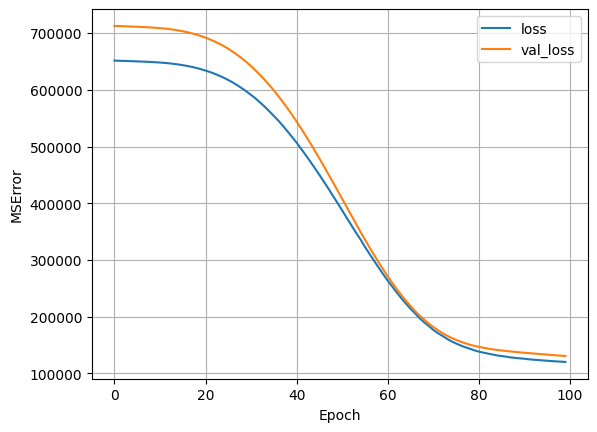

In [88]:
plot_loss(all_history_nn)

In [91]:
#MSE
y_pred=all_nn_model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [92]:
np.square(y_pred-y_test).mean()

np.float64(118332.86555718452)

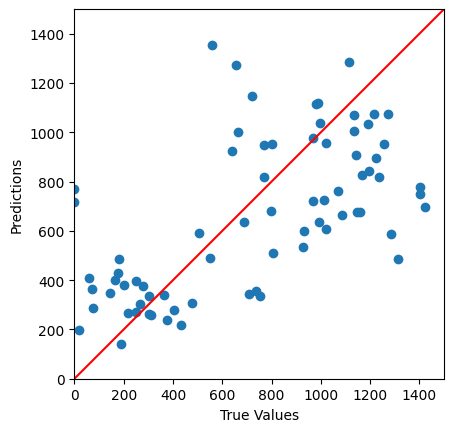

In [97]:
ax=plt.axes(aspect='equal')
plt.scatter(y_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims=[0,1500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims,c='red')